In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd drive


/content/drive


In [ ]:
cd My\ Drive

/content/drive/My Drive


In [ ]:
cd IP_IIITD

/content/drive/My Drive/IP_IIITD


In [ ]:
!wget http://mftp.mmcheng.net/Data/MSRA10K_Imgs_GT.zip

--2020-08-17 11:50:19--  http://mftp.mmcheng.net/Data/MSRA10K_Imgs_GT.zip
Resolving mftp.mmcheng.net (mftp.mmcheng.net)... 108.179.231.110
Connecting to mftp.mmcheng.net (mftp.mmcheng.net)|108.179.231.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205213299 (196M) [application/zip]
Saving to: ‘MSRA10K_Imgs_GT.zip’

MSRA10K_Imgs_GT.zip 100%[===================>] 195.71M  59.8MB/s    in 3.6s    

2020-08-17 11:50:23 (54.9 MB/s) - ‘MSRA10K_Imgs_GT.zip’ saved [205213299/205213299]



In [ ]:
cd Dataset_MSRA/

/content/drive/My Drive/IP_IIITD/Dataset_MSRA


In [ ]:
!wget http://mftp.mmcheng.net/Data/MSRA10K_Imgs_GT.zip

--2020-08-17 11:51:18--  http://mftp.mmcheng.net/Data/MSRA10K_Imgs_GT.zip
Resolving mftp.mmcheng.net (mftp.mmcheng.net)... 108.179.231.110
Connecting to mftp.mmcheng.net (mftp.mmcheng.net)|108.179.231.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205213299 (196M) [application/zip]
Saving to: ‘MSRA10K_Imgs_GT.zip’

MSRA10K_Imgs_GT.zip 100%[===================>] 195.71M  56.0MB/s    in 3.8s    

2020-08-17 11:51:22 (51.8 MB/s) - ‘MSRA10K_Imgs_GT.zip’ saved [205213299/205213299]



In [ ]:
ls


MSRA10K_Imgs_GT.zip


In [ ]:
!unzip MSRA10K_Imgs_GT.zip

In [ ]:
def CVD_Stim (img, CVD_type):
	sizeImg = img.shape 
	if(len(sizeImg)==3):
	    imgHeight = sizeImg[0]
	    imgWidth  = sizeImg[1]
	    imgB = img[:,:,0]
	    imgG = img[:,:,1]
	    imgR = img[:,:,2]
	else:
	    imgHeight = 1
	    imgWidth  = sizeImg[0]
	    imgB = img[:,0]
	    imgG = img[:,1]
	    imgR = img[:,2]
	GAMMA  = 2.2
	imgRGBVec = np.concatenate(([imgR.flatten()], [imgG.flatten()], [imgB.flatten()]), axis = 0)
	imgRGBVec = np.power(imgRGBVec, GAMMA)

	rgb2lms = [[17.8824, 43.5161, 4.11935],[3.45565, 27.1554, 3.86714], [0.0299566, 0.184309, 1.46709]]
	lms2rgb = [[0.0809, -0.1305, 0.1167], [-0.0102, 0.0540, -0.1136], [-0.0004, -0.0041, 0.6935]]
	imgLMSVec = np.mat(rgb2lms) * np.mat(imgRGBVec)

	T = []
	if CVD_type == "Protanopia":
		T = [[0, 2.02344, -2.52581], [0, 1, 0] ,[0, 0, 1]] 
	elif CVD_type == "Deuteranope":
		T = [[1, 0, 0], [0.494207, 0, 1.24827], [0, 0, 1]]
	else:
		T = [[1, 0, 0], [0, 1, 0], [-0.395913, 0.801109, 0]]

	imgSimLMS = T * imgLMSVec
	imgSimRGBVec = lms2rgb*imgSimLMS

	imgSimR = imgSimRGBVec[0,:]
	imgSimG = imgSimRGBVec[1,:]
	imgSimB = imgSimRGBVec[2,:]

	imgSimR = np.array(imgSimR, dtype = np.complex)
	imgSimG = np.array(imgSimG, dtype = np.complex)
	imgSimB = np.array(imgSimB, dtype = np.complex)


	imgSimR = np.real(np.power(imgSimR, 1/GAMMA))
	imgSimG = np.real(np.power(imgSimG, 1/GAMMA))
	imgSimB = np.real(np.power(imgSimB, 1/GAMMA))

	imgSimR = np.reshape(imgSimR, [imgHeight, imgWidth])
	imgSimG = np.reshape(imgSimG, [imgHeight, imgWidth])
	imgSimB = np.reshape(imgSimB, [imgHeight, imgWidth])

	imgSim =  cv2.merge((imgSimB,imgSimG,imgSimR))
	return imgSim

In [ ]:
import cv2
import numpy as np
import os
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape

image_Size = 200

X = []
Y = []
fileName = []


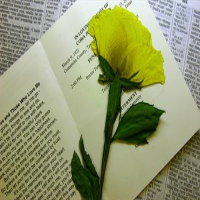

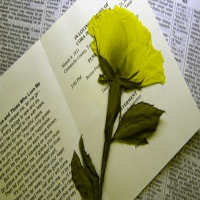

500


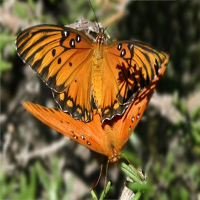

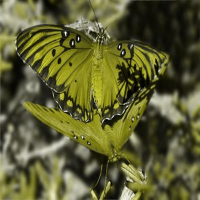

1000
1001


In [ ]:


dirPath = "/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Imgs"
count = 0
for file in os.listdir(dirPath):
    if file.endswith(".jpg"):
      count+=1
      image = np.array(cv2.resize(cv2.imread(dirPath + "/" + file), (image_Size, image_Size)))
      X.append(image)
      Y.append(CVD_Stim(image, "Protanopia")) 
      fileName.append(file)
      if(count%500 == 0):
        cv2_imshow(X[count - 1])
        cv2_imshow(np.uint8(Y[count - 1]))
        print(count)
      if(count > 1000):
        break

print(count)
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.1, random_state = 0)
X = np.array(X)
Y = np.array(Y)



# autoencoder.fit(x_train, x_train,
#                 epochs=100,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))

In [ ]:
import gc
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.1, random_state = 0)


# X = []
# Y = []
# gc.collect()


In [ ]:
# input_img = Input(shape=(image_Size,image_Size, 3))
# encoded = Dense(16, activation='relu')(input_img)
# encoded = Dense(8, activation='relu')(encoded)
# encoded = Dense(4, activation='relu')(encoded)

# decoded = Dense(3, activation='sigmoid')(encoded)

# autoencoder = Model(input_img, decoded)
# autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# autoencoder.fit(Xtrain/255, 
#                 Ytrain/255, 
#                 validation_data =(Xtest/255, Ytest/255), 
#                 epochs = 10, 
#                 batch_size = 16)

Epoch 1/10
 28/124 [=====>........................] - ETA: 16s - loss: 0.0869

KeyboardInterrupt: ignored

In [ ]:
# autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
dense_4 (Dense)              (None, 200, 200, 16)      64        
_________________________________________________________________
dense_5 (Dense)              (None, 200, 200, 8)       136       
_________________________________________________________________
dense_6 (Dense)              (None, 200, 200, 4)       36        
_________________________________________________________________
dense_7 (Dense)              (None, 200, 200, 3)       15        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [ ]:


model = Sequential()

#1st convolution layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_Size,image_Size,3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2nd convolution layer
model.add(Conv2D(16,(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(8,(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(4,(3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(3,(3, 3), padding='same'))
model.add(Activation('sigmoid'))

# model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# model.add(Conv2D(1,(3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# model.add(Flatten())
# model.add(Dense(64))


#-------------------------
# model.add(Dense(625))
# model.add(Reshape((25, 25, 1)))

# model.add(Conv2D(1,(3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(UpSampling2D((2, 2)))

#3rd convolution layer
# model.add(Conv2D(2,(3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(UpSampling2D((2, 2)))

# model.add(Conv2D(8,(3, 3), padding='same'))
# model.add(Activation('relu'))

# #4rd convolution layer
# model.add(Conv2D(16,(3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(UpSampling2D((2, 2)))

# #-------------------------

# model.add(Conv2D(3,(3, 3), padding='same'))
# model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()
print(Xtrain.shape)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 16)      4624      
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 8)       1160      
_________________________________________________________________
activation_2 (Activation)    (None, 200, 200, 8)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 200, 200, 4)       2

In [ ]:
model.fit(Xtrain/255, Ytrain/255,
                epochs=10,
                batch_size=16,
                shuffle=True,
                validation_data=(Xtest/255, Ytest/255))

Epoch 1/10
124/124 [==============================] - 261s 2s/step - loss: 0.0358 - val_loss: 0.0086
Epoch 2/10
124/124 [==============================] - 261s 2s/step - loss: 0.0076 - val_loss: 0.0053
Epoch 3/10
124/124 [==============================] - 261s 2s/step - loss: 0.0037 - val_loss: 0.0024
Epoch 4/10
124/124 [==============================] - 260s 2s/step - loss: 0.0023 - val_loss: 0.0020
Epoch 5/10
124/124 [==============================] - 260s 2s/step - loss: 0.0021 - val_loss: 0.0025
Epoch 6/10
124/124 [==============================] - 261s 2s/step - loss: 0.0019 - val_loss: 0.0017
Epoch 7/10
124/124 [==============================] - 261s 2s/step - loss: 0.0017 - val_loss: 0.0014
Epoch 8/10
124/124 [==============================] - 261s 2s/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/10
124/124 [==============================] - 260s 2s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/10
124/124 [==============================] - 260s 2s/step - loss: 0.0010 - val_lo

In [ ]:
#Saving output images and/or model in Gdrive, commented for safety


# index = 0
# for file in fileName:
#   inImg = X[index]/255
#   image = np.uint8(model.predict(np.array([inImg]))[0]*255)
#   cv2.imwrite("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Imgs_2_2/" + file, image)
#   index+=1

# print(index)

# dirPath = "/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/model_2100Images_Epochs10.h5"
# model.save(dirPath)


In [ ]:
# del model
from keras.models import load_model
dirPath = "/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/model_2100Images_Epochs10.h5"
model = load_model(dirPath)

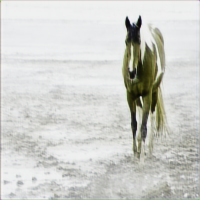

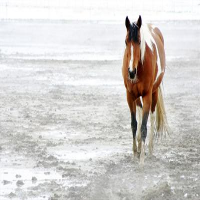

In [ ]:
inImg = X[1000]
outImg = model.predict(np.array([inImg/255]))[0]*255
cv2_imshow(np.uint8(outImg))
cv2_imshow(np.uint8(inImg))

In [ ]:
count = -1
map = {}
for inImg in X:
  count+=1
  outImage = np.uint8(model.predict(np.array([inImg/255]))[0]*255)
  for x in range(0, image_Size):
    for y in range(0, image_Size):
      key = tuple(inImg[x][y])
      # print(key)
      if key in map:
        map[key].append(outImage[x][y])
      else:
        map[key] = [outImage[x][y]]
  if(count % 200 == 0):
    print(count)

0
200
400
600
800
1000


In [ ]:
#Saving dictionary
# import pickle
# a_file = open("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map_1000Images.pkl", "wb")
# pickle.dump(map, a_file)
# a_file.close()

# import json
# a_file = open("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map_1000Images.json", "w")
# json.dumps(map)
# a_file.write(json)
# a_file.close()

np.save("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map_1000Images.mat", map) 

# a_file = open("data.pkl", "rb")
# output = pickle.load(a_file)

In [ ]:
count2 = 0
map2 = {}
print(len(map.keys()))
for key in map:
  arr = map[key]
  B,G,R = 0, 0, 0
  length = len(arr)
  for subArr in arr:
    B+=subArr[0]/length
    G+=subArr[1]/length
    R+=subArr[2]/length
    # print(subArr)
  map2[key] = [B, G, R]
  count2+=1
  if(count2 % 1000000 == 0):
    print(count2)

4794075
1000000
2000000
3000000
4000000


In [ ]:
map3 = {}
print(len(map2.keys()))
count3 = 0
for key in map:
  arr = map[key]
  length = len(arr)
  varB, varG, varR = 0, 0, 0
  meanArr = map2[key]
  for subArr in arr:
    varB += (pow(subArr[0] - meanArr[0], 2))/length
    varG += (pow(subArr[1] - meanArr[1], 2))/length
    varR += (pow(subArr[2] - meanArr[2], 2))/length
  map3[key] = [varB, varG, varR]
  count3+=1
  if(count3 % 1000000 == 0):
    print(count3)

4794075
1000000
2000000
3000000
4000000


In [ ]:
print(len(map3.keys()))
# for key in map2:
#   print(key, map2[key])
#   break

4794075


In [ ]:
import pickle
a_file = open("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/Map2_Mean__1000Images.pkl", "wb")
pickle.dump(map2, a_file)
a_file.close()

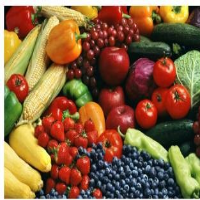

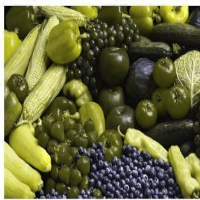

In [ ]:

dirPath = "/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/tileshop2.jpg"
image = np.array(cv2.resize(cv2.imread(dirPath), (image_Size, image_Size)))
cv2_imshow(image) 
cv2_imshow(np.uint8(CVD_Stim(image, "Protanopia"))) 

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras import models

layer_outputs = [layer.output for layer in model.layers[:10]]

activation_model = models.Model(inputs = model.input, outputs = layer_outputs) # Creates a model that will return these outputs, given the model input

image = np.array(cv2.resize(cv2.imread("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/red.jpg"), (image_Size, image_Size)))
inImg = image/255

# index = 1000
# inImg = Xtrain[index]/255

activations = activation_model.predict(np.array([inImg]))

# first_layer_activation = activations[0]
# print(first_layer_activation.shape)

# plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')
# cv2_imshow(np.uint8(inImg*255))

0.005 (400, 3200)
0.005 (400, 3200)
0.0075 (400, 1600)
0.0075 (400, 1600)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


0.01125 (400, 800)
0.01125 (400, 800)
0.016875 (400, 400)
0.016875 (400, 400)
0.0253125 (600, 200)
0.0253125 (600, 200)


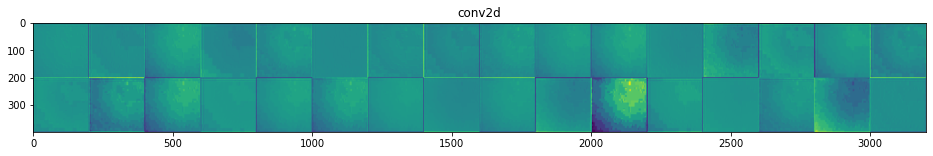

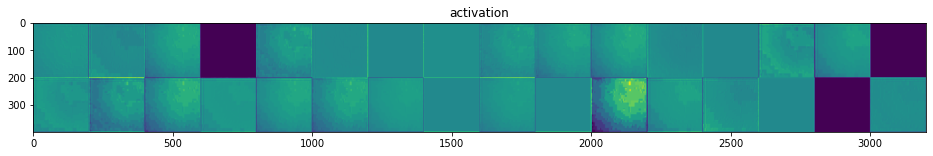

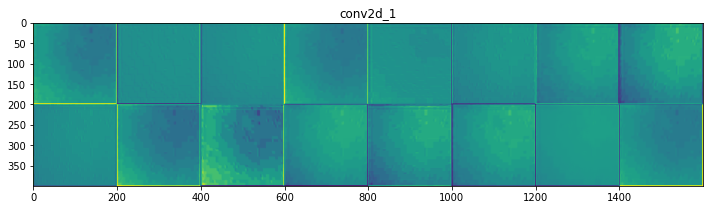

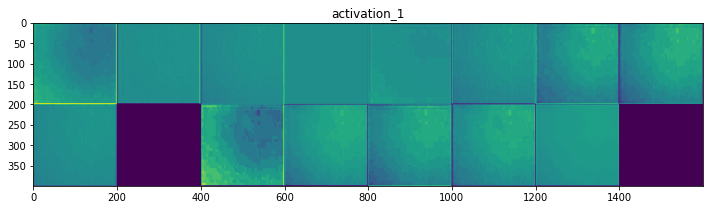

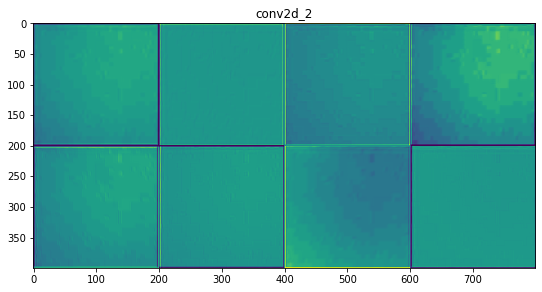

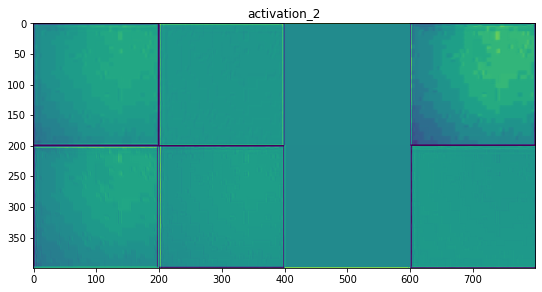

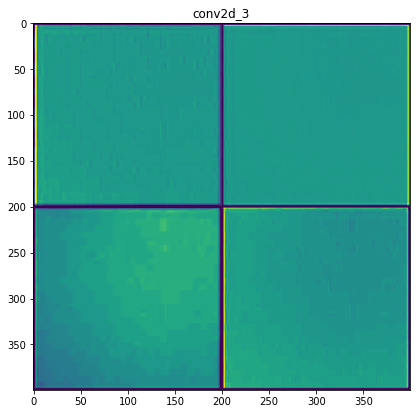

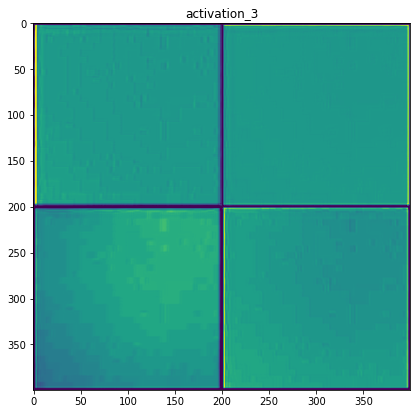

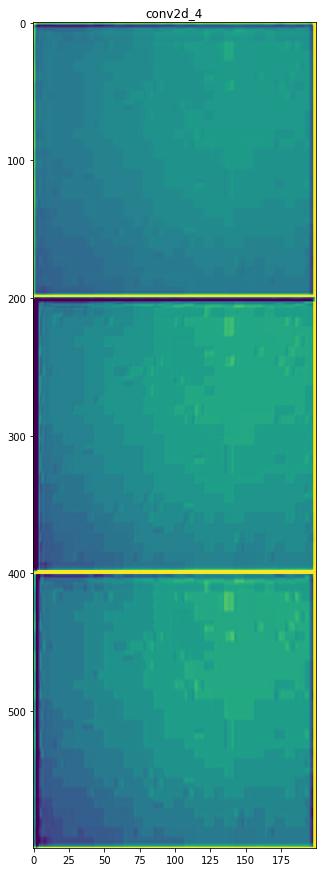

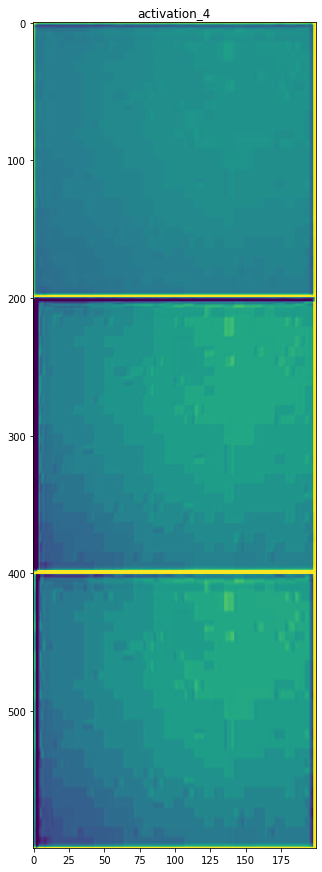

In [ ]:
layer_names = []
for layer in model.layers[:10]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

    

images_per_row = 16
step = 0
scale = 1
size = image_Size
scale = 1./size
for layer_name, layer_activation in zip(layer_names, activations): 
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    # print("n_features", n_features)
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    # print("size", size)
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    # print("n_cols", n_cols)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    
    print(scale, display_grid.shape)
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    if (step == 1):
      images_per_row = images_per_row//2
      step = 0
      scale*=1.5
    else:
      step+=1





In [ ]:

inImg = Xtrain[index]/255
outImg = model.predict(np.array([inImg]))[0]
print("Model prediction")
cv2_imshow(np.uint8(outImg*255))
print("MOdel input")
cv2_imshow(np.uint8(inImg*255))
print("Ideal prediction")
cv2_imshow(Ytrain[index])

# plt.figure(figsize=(3 * Xtrain[index].shape[1], 3 * Xtrain[index].shape[0]))
plt.subplot(331)
plt.imshow(Xtrain[index][:, :, 0]/255, aspect='auto', cmap='Greys')
plt.subplot(332)
plt.imshow(Ytrain[index][:, :, 0]/255, aspect='auto', cmap='Greys')
plt.subplot(333)
plt.imshow(outImg[:, :, 0], aspect='auto', cmap='Greys')
plt.subplot(334)
plt.imshow(Xtrain[index][:, :, 1]/255, aspect='auto', cmap='Greys')
plt.subplot(335)
plt.imshow(Ytrain[index][:, :, 1]/255, aspect='auto', cmap='Greys')
plt.subplot(336)
plt.imshow(outImg[:, :, 1], aspect='auto', cmap='Greys')
plt.subplot(337)
plt.imshow(Xtrain[index][:, :, 2]/255, aspect='auto', cmap='Greys')
plt.subplot(338)
plt.imshow(Ytrain[index][:, :, 2]/255, aspect='auto', cmap='Greys')
plt.subplot(339)
plt.imshow(outImg[:, :, 2], aspect='auto', cmap='Greys')
# plt.figure()
# plt.imshow(idealImg/255)
# # plt.imshow(Ytrain[index]/255)
# plt.show()
# plt.imshow(outImg)
# plt.show()

print(np.sum(np.square(Xtrain[index][:, :, 0]/255 - Ytrain[index][:, :, 0]/255)))
print(np.sum(np.square(Xtrain[index][:, :, 1]/255 - Ytrain[index][:, :, 1]/255)))
print(np.sum(np.square(Xtrain[index][:, :, 2]/255 - Ytrain[index][:, :, 2]/255)))



print(np.sum(np.square(inImg[:, :, 0]/255 - outImg[:, :, 0])))
print(np.sum(np.square(inImg[:, :, 1]/255 - outImg[:, :, 1])))
print(np.sum(np.square(inImg[:, :, 2]/255 - outImg[:, :, 2])))



NameError: ignored

Model prediction


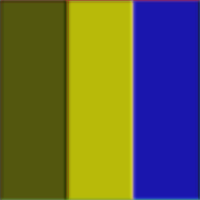

MOdel input


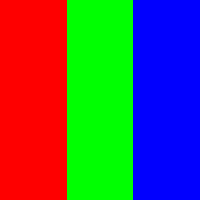

Ideal prediction


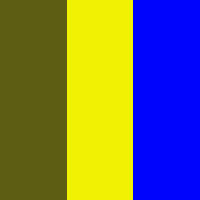

Difference between Input and ideal
Blue 85.77738100229227
Green 1866.2539750502106
Red 17096.129733325946
Difference between Input and predicted
Blue 1576.6672524010773
Green 2788.839135398661
Red 13080.210247722152


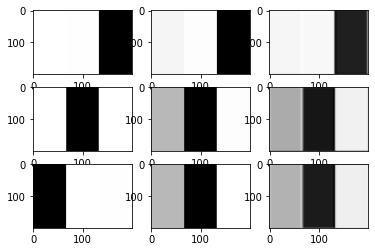

In [ ]:

im = np.zeros((200, 200, 3))
im[:, :, 2] = 255*np.ones((200, 1))

image = np.array(cv2.resize(cv2.imread("/content/drive/My Drive/IP_IIITD/Dataset_MSRA/MSRA10K_Imgs_GT/rgb.jpg"), (image_Size, image_Size)))
inImg = image
outImg = model.predict(np.array([inImg/255]))[0]
idealImg = CVD_Stim(inImg, "Protanopia")
print("Model prediction")
cv2_imshow(np.uint8(outImg*255))
print("MOdel input")
cv2_imshow(np.uint8(inImg))
print("Ideal prediction")
cv2_imshow(idealImg)
plt.subplot(331)
plt.imshow(inImg[:, :, 0]/256, aspect='auto', cmap='Greys')
plt.subplot(332)
plt.imshow(idealImg[:, :, 0]/256, aspect='auto', vmin = 0, cmap='Greys')
plt.subplot(333)
plt.imshow(outImg[:, :, 0], aspect='auto',vmin = 0, cmap='Greys')
plt.subplot(334)
plt.imshow(inImg[:, :, 1]/256, aspect='auto',vmin = 0, cmap='Greys')
plt.subplot(335)
plt.imshow(idealImg[:, :, 1]/256, aspect='auto',vmin = 0, cmap='Greys')
plt.subplot(336)
plt.imshow(outImg[:, :, 1], aspect='auto',vmin = 0, cmap='Greys')
plt.subplot(337)
plt.imshow(inImg[:, :, 2]/256, aspect='auto',vmin = 0, cmap='Greys')
plt.subplot(338)
plt.imshow(idealImg[:, :, 2]/256, aspect='auto',vmin = 0, cmap='Greys')
plt.subplot(339)
plt.imshow(outImg[:, :, 2], aspect='auto',vmin = 0, cmap='Greys')


print("Difference between Input and ideal")
print("Blue", np.sum(np.square(inImg[:, :, 0]/255 - idealImg[:, :, 0]/255)))
print("Green", np.sum(np.square(inImg[:, :, 1]/255 - idealImg[:, :, 1]/255)))
print("Red", np.sum(np.square(inImg[:, :, 2]/255 - idealImg[:, :, 2]/255)))

print("Difference between Input and predicted")
print("Blue", np.sum(np.square(inImg[:, :, 0]/255 - outImg[:, :, 0])))
print("Green", np.sum(np.square(inImg[:, :, 1]/255 - outImg[:, :, 1])))
print("Red", np.sum(np.square(inImg[:, :, 2]/255 - outImg[:, :, 2])))


[[94.30270272 94.30270272 94.30270272 ... 94.30270272 94.30270272
  94.30270272]
 [94.30270272 94.30270272 94.30270272 ... 94.30270272 94.30270272
  94.30270272]
 [94.30270272 94.30270272 94.30270272 ... 94.30270272 94.30270272
  94.30270272]
 ...
 [94.30270272 94.30270272 94.30270272 ... 94.30270272 94.30270272
  94.30270272]
 [94.30270272 94.30270272 94.30270272 ... 94.30270272 94.30270272
  94.30270272]
 [94.30270272 94.30270272 94.30270272 ... 94.30270272 94.30270272
  94.30270272]] 0.36836993249897243


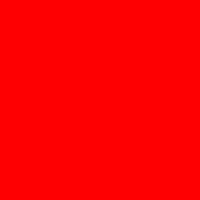

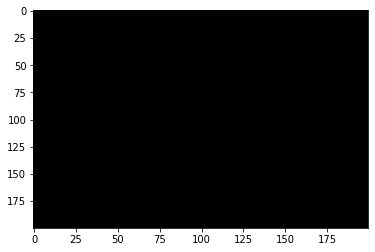

In [ ]:
print(idealImg[:, :, 2],  (idealImg[:, :, 2]/256).min())
im = np.zeros((200, 200, 3))
im[:, :, 2] = 255*np.ones((200, 1))
cv2_imshow(im)
plt.imshow(idealImg[:, :, 2]/256, aspect='auto', vmin = ((idealImg[:, :, 2] - 1)/256).min(),  cmap='Greys')

In [ ]:
from keras import backend as K 
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint 
from keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Reshape
input_shape = (image_Size, image_Size, 3) 
batch_size = 32
kernel_size = 3
latent_dim = 64
layer_filters = [32, 16, 8] 

inputs = Input(shape = input_shape) 
x = inputs 
for filters in layer_filters: 
  x = Conv2D(filters = filters, 
           kernel_size = kernel_size, 
           strides = 2, 
           activation ='relu', 
           padding ='same')(x) 
  
shape = K.int_shape(x) 
x = Flatten()(x) 
latent = Dense(latent_dim, name ='latent_vector')(x) 
encoder = Model(inputs, latent, name ='encoder') 

latent_inputs = Input(shape =(latent_dim, ), name ='decoder_input') 
x = Dense(shape[1]*shape[2]*shape[3])(latent_inputs) 
x = Reshape((shape[1], shape[2], shape[3]))(x) 
# stack of Conv2DTranspose(256)-Conv2DTranspose(128)- 
# Conv2DTranspose(64) 
for filters in layer_filters[::-1]: 
  x = Conv2DTranspose(filters = filters, 
                      kernel_size = kernel_size, 
                      strides = 2, 
                      activation ='relu', 
                      padding ='same')(x) 
outputs = Conv2DTranspose(filters = 3, 
                          kernel_size = kernel_size, 
                          activation ='sigmoid', 
                          padding ='same', 
                          name ='decoder_output')(x) 
decoder = Model(latent_inputs, outputs, name ='decoder')

autoencoder = Model(inputs, decoder(encoder(inputs)), 
                    name ='autoencoder') 
autoencoder.compile(optimizer='sgd', loss='mean_squared_error')



In [ ]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 16)        4624      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 8)         1160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 64)                320064    
Total params: 326,744
Trainable params: 326,744
Non-trainable params: 0
_____________________________________________________

In [ ]:
autoencoder.fit(Xtrain, 
                Ytrain, 
                validation_data =(Xtest, Ytest), 
                epochs = 5, 
                batch_size = batch_size)

Epoch 1/5
57/57 [==============================] - 84s 1s/step - loss: 15928.4014 - val_loss: 15596.5371
Epoch 2/5
57/57 [==============================] - 82s 1s/step - loss: 15926.3145 - val_loss: 15596.5371
Epoch 3/5
57/57 [==============================] - 82s 1s/step - loss: 15926.3154 - val_loss: 15596.5371
Epoch 4/5
57/57 [==============================] - 83s 1s/step - loss: 15926.3125 - val_loss: 15596.5371
Epoch 5/5
57/57 [==============================] - 83s 1s/step - loss: 15926.3164 - val_loss: 15596.5371


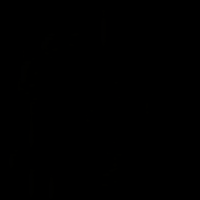

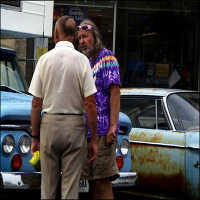

In [ ]:
inImg = Xtrain[3]
outImg = model.predict(np.array([inImg]))[0]
cv2_imshow(np.uint8(outImg))
cv2_imshow(np.uint8(inImg))

In [ ]:
outImg

array([[[5.0000745e-01, 5.0000739e-01, 5.0000745e-01],
        [5.0000745e-01, 5.0000739e-01, 5.0000745e-01],
        [5.0000745e-01, 5.0000739e-01, 5.0000745e-01],
        ...,
        [9.9999839e-01, 1.0077059e-03, 1.6050153e-11],
        [9.9999839e-01, 1.0077059e-03, 1.6050153e-11],
        [9.9954033e-01, 6.9701672e-04, 1.3494492e-04]],

       [[5.0000745e-01, 5.0000739e-01, 5.0000745e-01],
        [5.0000745e-01, 5.0000739e-01, 5.0000745e-01],
        [5.0000745e-01, 5.0000739e-01, 5.0000745e-01],
        ...,
        [1.0000000e+00, 5.4064945e-08, 1.3712994e-13],
        [1.0000000e+00, 5.4064945e-08, 1.3712994e-13],
        [9.9995220e-01, 2.2397575e-08, 3.6838213e-07]],

       [[5.0000745e-01, 5.0000739e-01, 5.0000745e-01],
        [5.0000745e-01, 5.0000739e-01, 5.0000745e-01],
        [5.0000745e-01, 5.0000739e-01, 5.0000745e-01],
        ...,
        [1.0000000e+00, 5.4064945e-08, 1.3712994e-13],
        [1.0000000e+00, 5.4064945e-08, 1.3712994e-13],
        [9.9995220e-01